# Class Grade Prediction

The summary results are below, for further information; code part consists of detailed explanations.

Several new functions defined with the purpose of data manipulation and feature engineering.

For Q1;
    According to given information, I defined the final score function and apply it without MT3 score.
    So my predictor is : calculated final score
    The target is : pass/fail condition
    I checked distribution of the feature and the target and there is no obstacle to use this setting.
    Decision tree classifer has been used as the predictor and the results are:
    Class:A
    Accuracy Score: 0.9423076923076923
        
    Class:B
    Accuracy Score: 0.8571428571428571
        
    Class:C
    Accuracy Score: 0.8970588235294118

For Q2;
    According to given information, I used only MT1 scores of all semesters and apply it..
    So my predictor is : MT1 scores of prior semesters
    The target is : pass/fail condition
    I checked distribution of the feature and the target and there is no obstacle to use this setting.
    Decision tree classifer has been used as the predictor and the result is:

    Accuracy Score: 0.7891156462585034
        
For Q3;
    According to given information, I used TOTALs of class A and class B with the assumption of they include other column information.
    So my predictor is : TOTAL columns of class A and B 
    The target is : pass/fail condition
    I checked distribution of the feature and the target and there is no obstacle to use this setting.
    Several different predictors has been tried with cross validation and the GradientBoostingClassifier has been selected.
    The results are:
    
    DecisionTreeClassifier
    Accuracy Score of each fold
    [0.8372093  0.86046512 0.94186047]
    Mean Accuracy Score - 0.87984496124031
    
    BaggingClassifier
    Accuracy Score of each fold
    [0.84883721 0.87209302 0.94186047]
    Mean Accuracy Score - 0.8875968992248061
    
    RandomForestClassifier
    Accuracy Score of each fold
    [0.86046512 0.86046512 0.90697674]
    Mean Accuracy Score - 0.8759689922480619
    
    AdaBoostClassifier
    Accuracy Score of each fold
    [0.88372093 0.8372093  0.93023256]
    Mean Accuracy Score - 0.883720930232558
    
    GradientBoostingClassifier
    Accuracy Score of each fold
    [0.89534884 0.86046512 0.94186047]
    Mean Accuracy Score - 0.8992248062015503

For Q4:
    According to given information, I used TOTALs of class A, class B and also more recent MT1 score.
    So my predictor is : TOTAL columns of class A, B, and MT1 score of class C. 
    The target is : pass/fail condition
    I checked distribution of the feature and the target and there is no obstacle to use this setting.
    Several different predictors has been tried with cross validation and the AdaBoostClassifier has been selected.
    It is no suprise that our previous accuracy scores in Q3 has improved significantly with new information.
    The results are:
        
    DecisionTreeClassifier
    Accuracy Score of each fold
    [0.88372093 0.87209302 0.95348837]
    Mean Accuracy Score - 0.9031007751937984
    
    BaggingClassifier
    Accuracy Score of each fold
    [0.91860465 0.86046512 0.93023256]
    Mean Accuracy Score - 0.9031007751937984
    
    RandomForestClassifier
    Accuracy Score of each fold
    [0.94186047 0.87209302 0.95348837]
    Mean Accuracy Score - 0.9224806201550387
    
    AdaBoostClassifier
    Accuracy Score of each fold
    [0.93023256 0.91860465 0.94186047]
    Mean Accuracy Score - 0.9302325581395349
    
    GradientBoostingClassifier
    Accuracy Score of each fold
    [0.93023256 0.88372093 0.95348837]
    Mean Accuracy Score - 0.9224806201550387

For Q5:
    According to given information, I have used all available information.
    So my predictor is : columns of class A, B and C. 
    The target is : GPA Brackets
    I checked distribution of the feature and the target and there is no obstacle to use this setting.
    Several different predictors has been tried with cross validation and with consideration of 
        accuracy and MSE, BaggingClassifier has been selected.
    It is no suprise that our accuracy score decreased because our classification layers increased.
    The results are:
        
    --------------------Accuracy Scores--------------------------
    
    DecisionTreeClassifier
    Accuracy Score of each fold
    [0.51851852 0.55555556 0.59259259]
    Mean Accuracy Score - 0.5555555555555555
    BaggingClassifier
    Accuracy Score of each fold
    [0.64197531 0.64197531 0.64197531]
    Mean Accuracy Score - 0.6419753086419753
    RandomForestClassifier
    Accuracy Score of each fold
    [0.65432099 0.55555556 0.58024691]
    Mean Accuracy Score - 0.5967078189300411
    AdaBoostClassifier
    Accuracy Score of each fold
    [0.45679012 0.50617284 0.40740741]
    Mean Accuracy Score - 0.45679012345679015
    GradientBoostingClassifier
    Accuracy Score of each fold
    [0.62962963 0.58024691 0.59259259]
    Mean Accuracy Score - 0.6008230452674898

    --------------------MSE Scores--------------------------

    DecisionTreeClassifier
    Accuracy Score of each fold
    [-0.9382716 -0.7037037 -0.7654321]
    Mean Accuracy Score - -0.8024691358024691
    BaggingClassifier
    Accuracy Score of each fold
    [-0.54320988 -0.50617284 -0.4691358 ]
    Mean Accuracy Score - -0.5061728395061729
    RandomForestClassifier
    Accuracy Score of each fold
    [-0.5308642  -0.61728395 -0.60493827]
    Mean Accuracy Score - -0.5843621399176955
    AdaBoostClassifier
    Accuracy Score of each fold
    [-0.72839506 -0.64197531 -0.85185185]
    Mean Accuracy Score - -0.7407407407407408
    GradientBoostingClassifier
    Accuracy Score of each fold
    [-0.59259259 -0.67901235 -0.44444444]
    Mean Accuracy Score - -0.5720164609053497

    However, overfit is a threat which would originated by high number of features and low number of sample size. 
    I checked overfitting and implemented hyperparameter tuning with randomized search.
    the result is;
    
    Accuracy Score =  0.7551020408163265
    
    The accuracy increased from 0.60 to 0.76.
    
    
    
    
    
    

# Import Libs and Manually Implemented Functions 

In [1]:
from Class_Grade_Prediction_utils import *

# Q1

Q1. For all the courses data given, use only the data of the respective course and predict
the pass/fail condition of the students given that the MT3 score is not available. Please
use a 80/20 test train split with a random state parameter equal to 42. Report you
accuracy score for each course and provide a detailed explanation of your solution
method.

In [4]:
#With respect to given information:
#Main assumption is; MT3's importance on passing score is not changed over the years for A and B classes.
#For class C, it was constant for first 3 years and it just increased %7.5 so it is proper to assume the weight of MT3 constant over the years.


#This part creates and aggregates all necessary features and targets. Creates graphs of dispersions.


#Re-creating our main dict's to be sure everything is clear and correct
class_A_list, class_B_list, class_C_list, class_A_dict, class_B_dict, class_C_dict,GPANew= create_class_dicts()

#This part uses former functions that we defined and creates final forms of main dictionaries.
for class_letter in ['A', 'B','C']:
    class_dict = locals()['class_'+class_letter+'_dict']
    #Fiils all MT3 columns with 0, because it is given that we have no clue about this feature.
    for dataframes in class_dict.values():
        dataframes['MT3'] = 0
    #Model decision took place in this section. While doing model; I decided to use only final score as the feature.
    #The code which is below calculates final scores without MT3 and transforms Grade column in to binary form.
    exec("aggreated_dict_"+class_letter+" = final_score_calculator(class_dict, class_name = class_letter)")
    exec("categorized_dict_"+class_letter+" = grade_categorizer(aggreated_dict_"+class_letter+")")
    print('aggreated_dict_'+class_letter+' is ready')
    #And our output dict is ready to use
    print('categorized_dict_'+class_letter+' is ready')
    
    
#Create aggreagated single feature dataframes to create train and test datas.
for class_letter in ['A', 'B','C']:
    df_list=[]
    final_df_list = []
    categorized_dict = locals()['categorized_dict_'+class_letter]
    #This part concatanates data of each class seperately in to dataframes which are ready to do tran and test split phase.
    for value in categorized_dict.values():
        df_list.append(value)
        locals()['q1_df_'+class_letter] = pd.concat(df_list,keys=list(range(0,len(df_list))))
        locals()['q1_df_'+class_letter] = locals()['q1_df_'+class_letter].reset_index().drop(['level_0', 'level_1'],axis = 1)
    print('q1_df_'+class_letter+' is ready')

#Pack class dataframes in list to iterate easily
final_df_list = [q1_df_A, q1_df_B, q1_df_C]
print('final_df_list is ready')


#Lets view each semesters dispersion with simple scatter plot graphs
print('Class Dispersions')
for class_df, classy in zip(final_df_list, ['A', 'B', 'C']): 
    print('Class:' + classy )
    scatter_plot_creater(class_df['FINAL_SCORE'],class_df['Grade'], 'Final_Score', 'Grade')

class_A_dict is ready
class_B_dict is ready
class_C_dict is ready
aggreated_dict_A is ready
categorized_dict_A is ready
aggreated_dict_B is ready
categorized_dict_B is ready
aggreated_dict_C is ready
categorized_dict_C is ready
q1_df_A is ready
q1_df_B is ready
q1_df_C is ready
final_df_list is ready
Class Dispersions
Class:A


<Figure size 640x480 with 1 Axes>

Class:B


<Figure size 640x480 with 1 Axes>

Class:C


<Figure size 640x480 with 1 Axes>

In [5]:
#This is the decision tree classifier which is our model.
for class_df, classy in zip(final_df_list, ['A', 'B', 'C']): 
    df_feature = class_df['FINAL_SCORE']
    target = class_df['Grade']
    print('Class:' + classy )
    train_x, test_x, train_y, test_y = train_test_split(df_feature, target, test_size = 0.2, random_state = 42, shuffle = True)
    my_decision_tree(train_x,train_y,test_x,test_y)

Class:A
                   
Class prediction: 
                   
[[ 7  1]
 [ 2 42]]
                   
Accuracy Score: 0.9423076923076923
Class:B
                   
Class prediction: 
                   
[[ 7  3]
 [ 5 41]]
                   
Accuracy Score: 0.8571428571428571
Class:C
                   
Class prediction: 
                   
[[ 9  6]
 [ 1 52]]
                   
Accuracy Score: 0.8970588235294118


# Q2

Q2. For Course C, given that 2013, 2014 and 2015 data is fully available and for Spring
semester 2018, only MT1 score is available. You are supposed to predict the pass/fail
condition of the students in 2018 given the available data. You may use any information
regarding Course C (that is 2013, 2014 and 2015 data) as the training data and your
test data will be the 2018 student data. Note that the grading scheme and the student
body has changed over the years. Once again report your accuracy score and provide
a detailed explanation of your solution method.

class_A_dict is ready
class_B_dict is ready
class_C_dict is ready
First 3 semesters (train data)


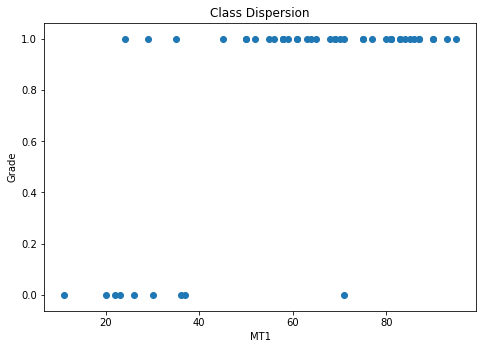

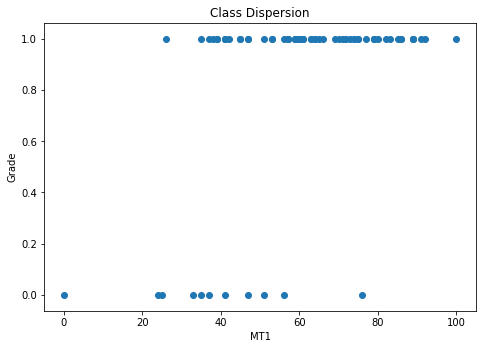

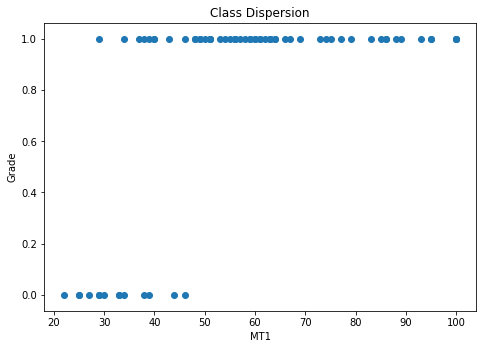

Last semester (test data)


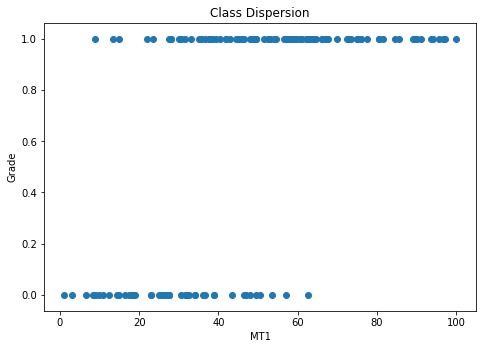

In [7]:
#Re-creating our main dict's to be sure everything is clear and correct
class_A_list, class_B_list, class_C_list, class_A_dict, class_B_dict, class_C_dict,GPANew = create_class_dicts()

#Create a copy of our main dictionary. Just a reflex to protection.
class_C_dict2 = class_C_dict.copy()

#Exctract necessary parts of our raw data and pick MT1 and Grade columns
for key, value in class_C_dict2.items():
    class_C_dict2[key] = value[['MT1', 'Grade']]   

#Transform Grade column to a categoric one.
class_C_dict2 = grade_categorizer(class_C_dict2)

#Here is our target semester
df_C2018New = class_C_dict2['C2018New']

#Unpacking necessary semesters from our main dict and appending them in to a list (list of semester dfs)
train_semester_list = ['C2013New', 'C2014New','C2015New']
first_3_semesters_list = [value for (key,value) in class_C_dict2.items() if key in train_semester_list] 


#Scatter plots of each class in terms of final scores without MT3 and binary form of grades
import matplotlib.pyplot as plt
print('First 3 semesters (train data)')
for i in list(range(0,3)):
    scatter_plot_creater(first_3_semesters_list[i]['MT1'],first_3_semesters_list[i]['Grade'], 'MT1', 'Grade')
print('Last semester (test data)')
 
scatter_plot_creater(df_C2018New['MT1'],df_C2018New['Grade'], 'MT1', 'Grade')
    
#According to below graphs of prior semesters, it is possible to see that there is almost exact relationship between MT1 Grade and the passing condition
#However what we know is, weight of MT1 changed last semester and information is limited with MT1.
#So it would be a good idea to apply weights of each semester and run a model afterwards. 
#However, I tried and it was -obviously- not a good idea.
#So I decided to go simple and trained as it is

In [8]:
#training dataframe
semester_df = pd.concat(first_3_semesters_list,keys=list(range(0,len(df_list))))
semester_df.reset_index().drop(['level_0', 'level_1'],axis = 1)

#test dataframe
df_C2018New

train_x = semester_df['MT1']
train_y = semester_df['Grade']
test_x = df_C2018New['MT1']
test_y = df_C2018New['Grade']

my_decision_tree(train_x,train_y,test_x,test_y)

                   
Class prediction: 
                   
[[41 10]
 [21 75]]
                   
Accuracy Score: 0.7891156462585034


# Q3

Q3.Assume that you have the full data available for Course A and B for years 2013, 2014
and 2015. You are supposed to predict the pass/fail condition of the Course C students
for years 2013, 2014 and 2015 with no information regarding Course C. Note that the
students are mostly the same students in these courses although there might a semester
shift (so one particular student taking Course A in 2013 but Course C in 2015). You
prediction will be based solely on the information of the student in previous courses.
Once again report your accuracy score and provide a detailed explanation of your
solution method.

In [10]:
#Re-creating our main dict's to be sure everything is clear and correct
class_A_list, class_B_list, class_C_list, class_A_dict, class_B_dict, class_C_dict,GPANew = create_class_dicts()

#Create a copy of our main dictionary. Just a reflex to protection.
class_A_dict2 = class_A_dict.copy()
class_B_dict2 = class_B_dict.copy()
class_C_dict2 = class_C_dict.copy()

#Exctract necessary parts of our raw data and pick MT1 and Grade columns
class_list = [class_A_dict2,class_B_dict2,class_C_dict2]
for class_dict in class_list:
    for key, value in class_dict.items():
        class_dict[key] = value[['StudentID', 'TOTAL', 'Grade']] 
    class_dict = grade_categorizer(class_dict)
    
#converting target data: class A in to a non-duplicate, categorized and fitered dataframe form
target_semestername_list = ['C2013New', 'C2014New','C2015New']
target_semesters_list = [value for (key,value) in class_C_dict2.items() if key in target_semestername_list] 
#Target dataframe
c_semester_df = pd.concat(target_semesters_list,join = 'outer', keys = 'StudentID')
c_semester_df = c_semester_df.reset_index().drop(['level_0', 'level_1','TOTAL'],axis = 1).drop_duplicates(subset = 'StudentID', keep = 'last').rename(columns={"Grade": "Grade_C"})


#converting train data:class A in to a non-duplicate, categorized and fitered dataframe form 
train_semestername_list_A = ['A2013New', 'A2014New','A2015New']
train_semesters_list_A = [value for (key,value) in class_A_dict2.items() if key in train_semestername_list_A] 
a_semester_df = pd.concat(train_semesters_list_A,join = 'outer', keys = 'StudentID')
a_semester_df = a_semester_df.reset_index().drop(['level_0', 'level_1'],axis = 1).drop_duplicates(subset = 'StudentID', keep = 'last').rename(columns={"TOTAL": "TOTAL_A", "Grade": "Grade_A"})

#converting train data:class B in to a non-duplicate, categorized and fitered dataframe form 
train_semestername_list_B = ['B2013New', 'B2014New','B2015New']
train_semesters_list_B = [value for (key,value) in class_B_dict2.items() if key in train_semestername_list_B] 
b_semester_df = pd.concat(train_semesters_list_B,join = 'outer', keys = 'StudentID')
b_semester_df = b_semester_df.reset_index().drop(['level_0', 'level_1'],axis = 1).drop_duplicates(subset = 'StudentID', keep = 'last').rename(columns={"TOTAL": "TOTAL_B", "Grade": "Grade_B"})

#Merge our features data class A, B and target class A dataframes in to one on StudentID key
#Filling NaN values with 1 is not a knowledge decision, I tried several possibilities, like 0, 999. Best solution is reached by 1
full_data_df = pd.merge(a_semester_df, pd.merge(c_semester_df, b_semester_df,how= 'outer', on = 'StudentID' ),how= 'outer', on = 'StudentID' ).fillna(1)

#This step is unnecessary in case of usage of cross validation function, however it was necessary while I was doing my trials on different models.
df_feature = full_data_df[['TOTAL_A','Grade_A','TOTAL_B', 'Grade_B']]
target = full_data_df['Grade_C']
train_x, test_x, train_y, test_y = train_test_split(df_feature, target, test_size = 0.2, random_state = 42, shuffle = True)
#my_decision_tree(train_x,train_y,test_x,test_y)


class_A_dict is ready
class_B_dict is ready
class_C_dict is ready


In [12]:
#We are trying new classifiers in question 3 as a result of multiple inputs.
#Q1 and Q2 have had single dimension features.So It was unnecessary to implement multiple classifiers.
#define desired predictors
clf = DecisionTreeClassifier()
bgc = BaggingClassifier(base_estimator=clf, n_estimators=10, random_state=42)
rfc = RandomForestClassifier(n_estimators=10)
abc = AdaBoostClassifier(n_estimators=10, random_state=42)
sgb = GradientBoostingClassifier(n_estimators=10, random_state=42)

#predictors list
classifier_list = [clf,bgc,rfc,abc,sgb]

#Calculate mean cv scores and view accuracies for each fold
classifier_name = []
cv_score_list = []
mean_cvs = []
for i in classifier_list:
    print('\033[1m'+str(i)[0:str(i).find('(')]+'\033[0m')
    classifier_name.append(str(i)[0:str(i).find('(')])
    cv_scores, mean_cv = lets_cross_validate(i, df_feature, target, cv = KFold(3, shuffle = True, random_state = 42), scoring = 'accuracy')
    cv_score_list.append(cv_scores)
    mean_cvs.append(mean_cv)

DecisionTreeClassifier
Accuracy Score of each fold
[0.8372093  0.84883721 0.86046512]
Mean Accuracy Score - 0.8488372093023256
BaggingClassifier
Accuracy Score of each fold
[0.84883721 0.87209302 0.94186047]
Mean Accuracy Score - 0.8875968992248061
RandomForestClassifier
Accuracy Score of each fold
[0.86046512 0.87209302 0.90697674]
Mean Accuracy Score - 0.87984496124031
AdaBoostClassifier
Accuracy Score of each fold
[0.88372093 0.8372093  0.93023256]
Mean Accuracy Score - 0.883720930232558
GradientBoostingClassifier
Accuracy Score of each fold
[0.89534884 0.86046512 0.94186047]
Mean Accuracy Score - 0.8992248062015503


So we choose GradientBoostingClassifier as a result of its success in accuracy score.

GradientBoostingClassifier
Accuracy Score of each fold

[0.89534884 0.86046512 0.94186047]

Mean Accuracy Score - 0.8992248062015503

# Q4

Q4. Similar to the previous question, but this time MT1 score is available for all the re-
spective semester for Course C. Therefore, your predictions will not be solely based
on student previous performance but this partially this course's data as well. Once
again report your accuracy score and provide a detailed explanation of your solution
method.

In [15]:
#Re-creating our main dict's to be sure everything is clear and correct
class_A_list, class_B_list, class_C_list, class_A_dict, class_B_dict, class_C_dict,GPANew= create_class_dicts()

#Create a copy of our main dictionary. Just a reflex to protection.
class_A_dict2 = class_A_dict.copy()
class_B_dict2 = class_B_dict.copy()
class_C_dict2 = class_C_dict.copy()

#Exctract necessary parts of our raw data and pick MT1 and Grade columns
class_list = [class_A_dict2,class_B_dict2,class_C_dict2]
for class_dict in class_list:
    for key, value in class_dict.items():
        class_dict[key] = value[['StudentID','MT1', 'TOTAL', 'Grade']] 
    class_dict = grade_categorizer(class_dict)
    
#converting target data: class A in to a non-duplicate, categorized and fitered dataframe form
target_semestername_list = ['C2013New', 'C2014New','C2015New']
target_semesters_list = [value for (key,value) in class_C_dict2.items() if key in target_semestername_list] 
#Target dataframe
c_semester_df = pd.concat(target_semesters_list,join = 'outer', keys = 'StudentID')
c_semester_df = c_semester_df.reset_index().drop(['level_0', 'level_1','TOTAL'],axis = 1).drop_duplicates(subset = 'StudentID', keep = 'last').rename(columns={"Grade": "Grade_C"})


#converting train data:class A in to a non-duplicate, categorized and fitered dataframe form 
train_semestername_list_A = ['A2013New', 'A2014New','A2015New']
train_semesters_list_A = [value for (key,value) in class_A_dict2.items() if key in train_semestername_list_A] 
a_semester_df = pd.concat(train_semesters_list_A,join = 'outer', keys = 'StudentID')
a_semester_df = a_semester_df.reset_index().drop(['level_0', 'level_1','MT1'],axis = 1).drop_duplicates(subset = 'StudentID', keep = 'last').rename(columns={"TOTAL": "TOTAL_A", "Grade": "Grade_A"})

#converting train data:class B in to a non-duplicate, categorized and fitered dataframe form 
train_semestername_list_B = ['B2013New', 'B2014New','B2015New']
train_semesters_list_B = [value for (key,value) in class_B_dict2.items() if key in train_semestername_list_B] 
b_semester_df = pd.concat(train_semesters_list_B,join = 'outer', keys = 'StudentID')
b_semester_df = b_semester_df.reset_index().drop(['level_0', 'level_1','MT1'],axis = 1).drop_duplicates(subset = 'StudentID', keep = 'last').rename(columns={"TOTAL": "TOTAL_B", "Grade": "Grade_B"})

#Merge our features data class A, B and target class A dataframes in to one on StudentID key
#Filling NaN values with 1 is not a knowledge decision, I tried several possibilities, like 0, 999. Best solution is reached by 1
full_data_df = pd.merge(a_semester_df, pd.merge(c_semester_df, b_semester_df,how= 'outer', on = 'StudentID' ),how= 'outer', on = 'StudentID' ).fillna(1)

#This step is unnecessary in case of usage of cross validation function, however it was necessary while I was doing my trials on different models.
df_feature = full_data_df[['TOTAL_A','Grade_A','TOTAL_B', 'Grade_B','MT1']]
target = full_data_df['Grade_C']
train_x, test_x, train_y, test_y = train_test_split(df_feature, target, test_size = 0.2, random_state = 42, shuffle = True)
#my_decision_tree(train_x,train_y,test_x,test_y)


class_A_dict is ready
class_B_dict is ready
class_C_dict is ready


In [16]:
#We are trying new classifiers in question 3 as a result of multiple inputs.
#Q1 and Q2 have had single dimension features.So It was unnecessary to implement multiple classifiers.
#define desired predictors
clf = DecisionTreeClassifier()
bgc = BaggingClassifier(base_estimator=clf, n_estimators=10, random_state=42)
rfc = RandomForestClassifier(n_estimators=10)
abc = AdaBoostClassifier(n_estimators=10, random_state=42)
sgb = GradientBoostingClassifier(n_estimators=10, random_state=42)

#predictors list
classifier_list = [clf,bgc,rfc,abc,sgb]

#Calculate mean cv scores and view accuracies for each fold
classifier_name = []
cv_score_list = []
mean_cvs = []
for i in classifier_list:
    print('\033[1m'+str(i)[0:str(i).find('(')]+'\033[0m')
    classifier_name.append(str(i)[0:str(i).find('(')])
    cv_scores, mean_cv = lets_cross_validate(i, df_feature, target, cv = KFold(3, shuffle = True, random_state = 42), scoring = 'accuracy')
    cv_score_list.append(cv_scores)
    mean_cvs.append(mean_cv)

DecisionTreeClassifier
Accuracy Score of each fold
[0.90697674 0.88372093 0.93023256]
Mean Accuracy Score - 0.9069767441860465
BaggingClassifier
Accuracy Score of each fold
[0.91860465 0.86046512 0.93023256]
Mean Accuracy Score - 0.9031007751937984
RandomForestClassifier
Accuracy Score of each fold
[0.94186047 0.87209302 0.95348837]
Mean Accuracy Score - 0.9224806201550387
AdaBoostClassifier
Accuracy Score of each fold
[0.93023256 0.91860465 0.94186047]
Mean Accuracy Score - 0.9302325581395349
GradientBoostingClassifier
Accuracy Score of each fold
[0.93023256 0.88372093 0.95348837]
Mean Accuracy Score - 0.9224806201550387


We did almost the same thing in Q3 - only with MT1 score of class C- and tables have turned. 
So there is no harm to give a look to roc_auc score in decision process.
AdaBoostClassifier: 0.869
GradientBoostingClassifier: 0.899

MT1's marginal effect is really high and significant in both accuracy and roc_auc

However, we choose AdaBoostClassifier with a higher accuracy and inner peace, thanks to MT1 scores


# Q5

5. Finally, given the grade performance of the student in all these courses, you are sup-
posed to predict the GPA bracket of the students (only the students taking at least one
course out of A,B and C in years 2013, 2014 and 2015). The brackets are dened as
2.00-2.50, 2.50-3.00, 3.00-3.50 and nally 3.50-4.00. Besides the accuracy score, please
consider Mean Square Error as another criterion while brackets are ordered as 1, 2,
3, and 4 respectively and predicting a close bracket is preferable to otherwise. Once
again report your accuracy score, MSE score and provide a detailed explanation of
your solution method.

In [30]:
#Re-creating our main dict's to be sure everything is clear and correct
class_A_list, class_B_list, class_C_list, class_A_dict, class_B_dict, class_C_dict,GPANew = create_class_dicts()

#Create a copy of our main dictionary. Just a reflex to protection.
class_A_dict2 = class_A_dict.copy()
class_B_dict2 = class_B_dict.copy()
class_C_dict2 = class_C_dict.copy()


#Grade is our categorical variable and we treat it like it is.
class_list = [class_A_dict2,class_B_dict2,class_C_dict2]
for class_dict in class_list:
    for key, value in class_dict.items():
        value['Grade'] = value['Grade'].astype('category').cat.codes
        class_dict[key] = value
        
        
        
#converting train data:class A in to a non-duplicate, categorized and fitered dataframe form 
train_semestername_list_A = ['A2013New', 'A2014New','A2015New']
train_semesters_list_A = [value for (key,value) in class_A_dict2.items() if key in train_semestername_list_A] 
a_semester_df = pd.concat(train_semesters_list_A,join = 'outer', keys = 'StudentID')
a_semester_df = a_semester_df.reset_index().drop(['level_0', 'level_1'],axis = 1).drop_duplicates(subset = 'StudentID', keep = 'last').rename(columns = {'Grade': 'Grade_A' , 'HW1': 'HW1_A', 'HW2' : 'HW2_A' , 'HW3':'HW3_A', 'MT1':'MT1_A', 'MT2':'MT2_A','MT3':'MT3_A','TOTAL' : 'TOTAL_A'})

#converting train data:class B in to a non-duplicate, categorized and fitered dataframe form 
train_semestername_list_B = ['B2013New', 'B2014New','B2015New']
train_semesters_list_B = [value for (key,value) in class_B_dict2.items() if key in train_semestername_list_B] 
b_semester_df = pd.concat(train_semesters_list_B,join = 'outer', keys = 'StudentID')
b_semester_df = b_semester_df.reset_index().drop(['level_0', 'level_1'],axis = 1).drop_duplicates(subset = 'StudentID', keep = 'last').rename(columns = {'Grade': 'Grade_B' , 'PRJ': 'PRJ_B', 'Q1' : 'Q1_B' , 'MT1':'MT1_B', 'MT2':'MT2_B','MT3':'MT3_B','TOTAL' : 'TOTAL_B'})

#converting train data:class A in to a non-duplicate, categorized and fitered dataframe form 
train_semestername_list_C = ['C2013New', 'C2014New','C2015New']
train_semesters_list_C = [value for (key,value) in class_C_dict2.items() if key in train_semestername_list_C] 
c_semester_df = pd.concat(train_semesters_list_C,join = 'outer', keys = 'StudentID')
c_semester_df = c_semester_df.reset_index().drop(['level_0', 'level_1'],axis = 1).drop_duplicates(subset = 'StudentID', keep = 'last').rename(columns = {'Grade': 'Grade_C' , 'PRJ': 'PRJ_C', 'Q1' : 'Q1_C' , 'MT1':'MT1_C', 'MT2':'MT2_C','MT3':'MT3_C','TOTAL' : 'TOTAL_C'})


#Lets categorize out GPA in to 4 brackets 
condlist = [GPANew['GPA']<=2.5,GPANew['GPA']<=3,GPANew['GPA']<=3.5, GPANew['GPA']<=4]
choicelist = [1,2,3,4]
GPANew['GPA'] = np.select(condlist,choicelist, default = 999 )
GPANew = GPANew.drop('TotalCredits',axis = 1)

#Merge our features data class A, B and C dataframes in to one on StudentID key
#Filling NaN values with 1 is not a knowledge decision, I tried several possibilities, like 0, 999. Best solution is reached by 1
#One important issue is applying inner join in last merge: if the student do not exist in GPANew, it not possible to assign an GPA bracket to her.
full_data_df = pd.merge(GPANew, pd.merge(a_semester_df, pd.merge(c_semester_df, b_semester_df,how= 'outer', on = 'StudentID' ),how= 'outer', on = 'StudentID' ), how = 'inner', on = 'StudentID' ).fillna(1)

#Set target array and features df
df_feature = full_data_df.drop('GPA',axis=1)
target = full_data_df['GPA']

class_A_dict is ready
class_B_dict is ready
class_C_dict is ready


In [23]:
#We are trying new classifiers in question 3 as a result of multiple inputs.
#Q1 and Q2 have had single dimension features.So It was unnecessary to implement multiple classifiers.
#define desired predictors
clf = DecisionTreeClassifier()
bgc = BaggingClassifier(base_estimator=clf, random_state=42)
rfc = RandomForestClassifier()
abc = AdaBoostClassifier(random_state=42)
sgb = GradientBoostingClassifier( random_state=42)

#predictors list
classifier_list = [clf,bgc,rfc,abc,sgb]

#Calculate mean cv scores and view accuracies for each fold
classifier_name = []
cv_score_list = []
mean_cvs = []
for i in classifier_list:
    print('\033[1m'+str(i)[0:str(i).find('(')]+'\033[0m')
    classifier_name.append(str(i)[0:str(i).find('(')])
    cv_scores, mean_cv = lets_cross_validate(i, df_feature, target, cv = KFold(4, shuffle = True, random_state = 42), scoring = 'accuracy')
    cv_score_list.append(cv_scores)
    mean_cvs.append(mean_cv)
#Calculate mean cv scores and view accuracies for each fold
classifier_name = []
cv_score_list = []
mean_cvs = []
print(' ')
print('--------------------MSE Scores--------------------------')
print(' ')
for i in classifier_list:
    print('\033[1m'+str(i)[0:str(i).find('(')]+'\033[0m')
    classifier_name.append(str(i)[0:str(i).find('(')])
    cv_scores, mean_cv = lets_cross_validate(i, df_feature, target, cv = KFold(4, shuffle = True, random_state = 42), scoring = 'neg_mean_squared_error')
    cv_score_list.append(cv_scores)
    mean_cvs.append(mean_cv)

DecisionTreeClassifier
Accuracy Score of each fold
[0.54098361 0.57377049 0.50819672 0.61666667]
Mean Accuracy Score - 0.5599043715846994
BaggingClassifier
Accuracy Score of each fold
[0.6557377  0.67213115 0.49180328 0.6       ]
Mean Accuracy Score - 0.6049180327868853
RandomForestClassifier
Accuracy Score of each fold
[0.63934426 0.59016393 0.57377049 0.63333333]
Mean Accuracy Score - 0.6091530054644809
AdaBoostClassifier
Accuracy Score of each fold
[0.63934426 0.60655738 0.50819672 0.23333333]
Mean Accuracy Score - 0.49685792349726776
GradientBoostingClassifier
Accuracy Score of each fold
[0.73770492 0.59016393 0.50819672 0.63333333]
Mean Accuracy Score - 0.6173497267759562
 
--------------------MSE Scores--------------------------
 
DecisionTreeClassifier
Accuracy Score of each fold
[-0.73770492 -0.54098361 -0.86885246 -0.58333333]
Mean Accuracy Score - -0.6827185792349727
BaggingClassifier
Accuracy Score of each fold
[-0.54098361 -0.47540984 -0.6557377  -0.65      ]
Mean Accuracy 

Best 3 classifiers, accuracy score, MSE:
 - BaggingClassifier = 0.6419753086419753 ,0.5061728395061729
 - RandomForestClassifier = 0.6172839506172839 ,0.5720164609053497
 - GradientBoostingClassifier = 0.6008230452674898, 0.5720164609053497

Possible to say, higher the models Accuracy score , lower the MSE score .
So we choose Bagging classifier and we will implement hyper parameter tuning on it.

##### Hyper-paraneter Tuning

In [27]:
train_x, test_x, train_y, test_y = train_test_split(df_feature, target, test_size = 0.2, random_state = 42, shuffle = True)
parameters = {
              'max_features': ['auto', 'sqrt','log2', None],
              'min_samples_leaf': [8, 12],
              'min_samples_split': [10, 14],
              'max_depth': list(np.linspace(5, 30, 2, dtype = int)) + [None],
              'learning_rate': [0.05,0.1,0.2,0.3],
              'n_estimators' : list(np.linspace(5, 100, 5, dtype = int)), 
             }
sgb = GradientBoostingClassifier( random_state=42)
model = RandomizedSearchCV(estimator = sgb, param_distributions = parameters, n_iter = 20, 
                               cv = 4, verbose= 5, random_state= 42, n_jobs = -1)
model.fit(train_x,train_y)


print("Random")
predictionforest = model.best_estimator_.predict(test_x)
print(confusion_matrix(test_y,predictionforest))
print(metrics.accuracy_score(test_y,predictionforest))

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   12.5s finished


Random
[[21  2  0  0]
 [ 2  8  0  0]
 [ 3  2  8  2]
 [ 0  0  1  0]]
0.7551020408163265


Final model parameters

In [28]:
#model.get_params
final_sgb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

final_sgb.fit(train_x,train_y)
predictionforest = model.best_estimator_.predict(test_x)
print(confusion_matrix(test_y,predictionforest))
print(metrics.accuracy_score(test_y,predictionforest))

[[21  2  0  0]
 [ 2  8  0  0]
 [ 3  2  8  2]
 [ 0  0  1  0]]
0.7551020408163265
